# Download Data

In [ ]:
import torchvision
import torch
import numpy as np
import pandas as pd

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
DOWNLOAD_MNIST = True
train_data = torchvision.datasets.MNIST(
    root = './minist/',
    train = True, # this is training data
    # transform = torchvision.transforms.ToTensor(),
    download = DOWNLOAD_MNIST,
)
test_data = torchvision.datasets.MNIST(root = './mnist/', train = False, download = DOWNLOAD_MNIST)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./minist/MNIST/raw/train-images-idx3-ubyte.gz to ./minist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./minist/MNIST/raw/train-labels-idx1-ubyte.gz to ./minist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./minist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./minist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./minist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./minist/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [ ]:
# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()

# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# 2. Data Processing

## Questions 1


### (a)

In [ ]:
from matplotlib import pyplot as plt
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

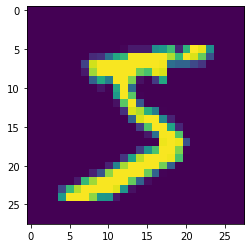

In [ ]:
plt.imshow(X_train[0])

In [ ]:
Y_train[0]

5

It shows a **5**. It does agree with the element shown in `Y_train`.


### (b)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
X_train_scaled = np.asarray([min_max_scaler.fit_transform(X_train[i]) for i in range(len(X_train))])
X_test_scaled = np.asarray([min_max_scaler.fit_transform(X_test[i]) for i in range(len(X_test))])

In [ ]:
# plt.imshow(X_train_scaled[0])

### (c)

In [ ]:
one_hot_encoder = preprocessing.OneHotEncoder()

In [ ]:
Y_train_encoded = one_hot_encoder.fit_transform(Y_train.reshape(len(Y_train), 1)).toarray()
Y_test_encoded = one_hot_encoder.fit_transform(Y_test.reshape(len(Y_test), 1)).toarray()

Using one-hot embedding, we can ensure that our label doesn't suffer from the ordinal property. Instead, one-hot embeding maps them into a higher dimension in which each label has the same distance to the origin. In this case, we benefit from not having much difference between each label.

# 3. Before Deep Learning

## Question 2

### (a)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [ ]:
knn_mod = KNeighborsClassifier()
AdaBoost_mod = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())
SVM_mod = SVC()

In [ ]:
knn_pred = knn_mod.fit(X_train, Y_train).predict(X_test)
AdaBoost_pred = AdaBoost_mod.fit(X_train, Y_train).predict(X_test)
SVM_pred = SVM_mod.fit(X_train, Y_train).predict(X_test)

In [ ]:
np.mean(knn_pred != Y_test)

0.0312

In [ ]:
np.mean(AdaBoost_pred != Y_test)

0.123

In [ ]:
np.mean(SVM_pred != Y_test)

0.0208

I cannot reproduce the exact result as shown in the report. A potential cause for this might be different implementation. Since I use implementation provided by sklearn, the behind resaoning could potentially be different from what they used back in the days.

### (b)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
param_grid = {'C': [0.1,1, 10]}

In [ ]:
my_mod = SVC(C = 10)

In [ ]:
# random = RandomizedSearchCV(estimator = my_mod, 
#                             param_distributions = param_grid, 
#                             n_iter = 10, 
#                             cv = 3, 
#                             verbose=2, 
#                             random_state=42, 
#                             n_jobs = -1)

In [ ]:
# random.fit(X_train, Y_train)

In [ ]:
my_mod_pred = my_mod.fit(X_train, Y_train).predict(X_test)

In [ ]:
np.mean(my_mod_pred != Y_test)

0.0163

# 4. Deep Learning 
## Question 3

### (a) & (b)

In [1]:
!nvidia-smi

Mon May  9 14:13:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [75]:
import torchvision
import numpy as np
import pandas as pd

DOWNLOAD_MNIST = True
train_data = torchvision.datasets.MNIST(
    root = './minist/',
    train = True, # this is training data
    # transform = torchvision.transforms.ToTensor(),
    download = DOWNLOAD_MNIST,
)
test_data = torchvision.datasets.MNIST(root = './mnist/', train = False, download = DOWNLOAD_MNIST)

# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()

# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = np.asarray([min_max_scaler.fit_transform(X_train[i]) for i in range(len(X_train))])
# X_test_scaled = np.asarray([min_max_scaler.fit_transform(X_test[i]) for i in range(len(X_test))])

# one_hot_encoder = preprocessing.OneHotEncoder()
# Y_train_encoded = one_hot_encoder.fit_transform(Y_train.reshape(len(Y_train), 1)).toarray()
# Y_test_encoded = one_hot_encoder.fit_transform(Y_test.reshape(len(Y_test), 1)).toarray()

X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# Data

# X_train # 60000 * (28*28)
# Y_train # 60000 * 10
# X_test # 10000 * (28*28)
# Y_test # 10000 * 10

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [77]:
from sklearn import preprocessing
import numpy as np

X_train_scale = preprocessing.normalize(X_train.reshape(-1,784))
X_test_scale = preprocessing.normalize(X_test.reshape(-1,784))

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto',  
                    sparse=True,
                    handle_unknown='ignore')                

Y_train_enc = ohe.fit_transform(Y_train.reshape(-1,1))
Y_test_enc = ohe.fit_transform(Y_test.reshape(-1,1))

In [78]:
x_train = torch.from_numpy(X_train_scale).type(torch.FloatTensor)
x_test = torch.from_numpy(X_test_scale).type(torch.FloatTensor)
y_train = torch.from_numpy(Y_train_enc.toarray()).type(torch.FloatTensor)
y_test = torch.from_numpy(Y_test_enc.toarray()).type(torch.FloatTensor)

In [79]:
# Define a class
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)          
        return x

In [80]:
def misclass_rate(out, label):
    pre = np.argmax(out.cpu().detach().numpy(), axis = 1)
    y = np.argmax(label.cpu().numpy(), axis = 1)
    count_correct = np.sum(pre == y)
    error_rate = (pre.shape[0] - count_correct) / pre.shape[0]
    return error_rate * 100

In [ ]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 200
learning_rate = 0.1
seed = [1, 15, 27, 34, 42, 55]

train_error_cross_entropy = {}
train_error_mean_misclass = {}
test_error_cross_entropy = {}
test_error_mean_misclass = {}

In [ ]:
use_cuda = torch.cuda.is_available()

In [ ]:
for i, s in enumerate(seed):
  torch.manual_seed(s)

  # instantiate a network
  net = OurNet(n_feature = input_size, n_hidden = hidden_size, n_output = num_classes) 

  # optimizing methods
  optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)
  # choose loss function
  loss_func = torch.nn.CrossEntropyLoss()

  train_error_cross_entropy[s] = []
  train_error_mean_misclass[s] = []
  test_error_cross_entropy[s] = []
  test_error_mean_misclass[s] = []

  if use_cuda:
    net.cuda()
  for t in range(num_epochs):
      # forward passing
      out = net(x_train.cuda())
      loss1 = loss_func(out, y_train.cuda())
      train_error_cross_entropy[s].append(loss1.cpu().detach().numpy())
      train_error_mean_misclass[s].append(misclass_rate(out, y_train))

      optimizer.zero_grad()
      loss1.backward()   
      optimizer.step()

      # on test set
      out2 = net(x_test.cuda())
      loss2 = loss_func(out2.cuda(), y_test.cuda())
      test_error_cross_entropy[s].append(loss2.cpu().detach().numpy())
      test_error_mean_misclass[s].append(misclass_rate(out2, y_test))



  torch.save(net.state_dict(), 'net' + str(i) + '_params.pkl')

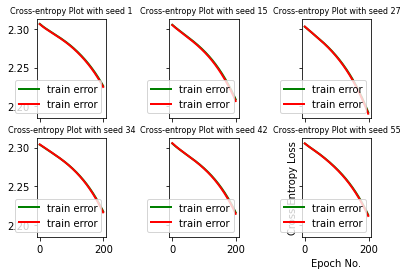

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Cross-Entropy Loss', ha='center', va='center', rotation='vertical')
i = 0
j = 0
for s in seed:
  if j == 3:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_cross_entropy[s], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_cross_entropy[s], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Cross-entropy Plot' + ' with seed ' + str(s), fontsize = 8)
  axs[i, j].legend()
  j += 1


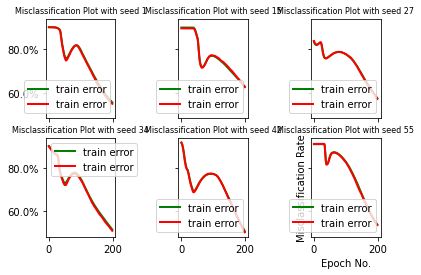

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Misclassification Rate', ha='center', va='center', rotation='vertical')

i = 0
j = 0
for s in seed:
  if j == 3:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_mean_misclass[s], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_mean_misclass[s], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Misclassification Plot' + ' with seed ' + str(s), fontsize = 8)
  axs[i, j].legend()
  axs[i, j].yaxis.set_major_formatter(mtick.PercentFormatter())
  j += 1

### (c)

In [ ]:
for s in seed:
  print(test_error_mean_misclass[s][-1])

54.87
62.59
57.16
51.01
50.32
53.66


In [ ]:
net = OurNet(n_feature=input_size, n_hidden=hidden_size, n_output=num_classes) 
net.load_state_dict(torch.load('net4_params.pkl'))

<All keys matched successfully>

In [ ]:
list(net.parameters())[0].shape

torch.Size([100, 784])

In [ ]:
weights = list(net.parameters())[0]

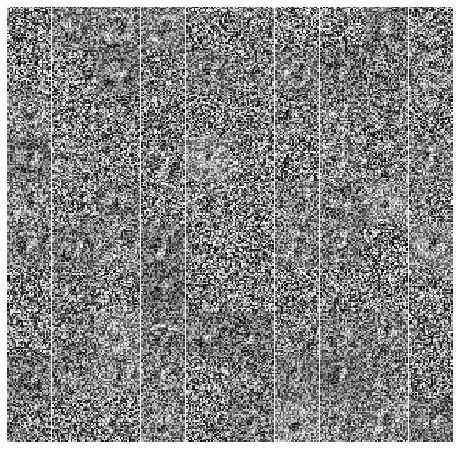

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(weights.shape[0]):
    plt.subplot(10, 10, i + 1) # Since we know it is a 10 x 10 grid
    x = weights[i,:].detach().numpy()
    plt.imshow(x.reshape((28, 28)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig("<filename>.png")

### (d)

**Experiment On Learning Rate**

In [ ]:
# Define a class
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)          
        return x

In [ ]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 200
learning_rate = [0.1, 0.01, 0.5, 0.9]

train_error_cross_entropy = {}
train_error_mean_misclass = {}
test_error_cross_entropy = {}
test_error_mean_misclass = {}

In [ ]:
for i, lr in enumerate(learning_rate): # i to keep track model
  torch.manual_seed(42)

  # instantiate a network
  net = OurNet(n_feature = input_size, n_hidden = hidden_size, n_output = num_classes) 

  # optimizing methods
  optimizer = torch.optim.SGD(net.parameters(), lr = lr)
  # choose loss function
  loss_func = torch.nn.CrossEntropyLoss()

  train_error_cross_entropy[lr] = []
  train_error_mean_misclass[lr] = []
  test_error_cross_entropy[lr] = []
  test_error_mean_misclass[lr] = []

  if use_cuda:
    net.cuda()
  for t in range(num_epochs):
      # forward passing
      out = net(x_train.cuda())
      loss1 = loss_func(out, y_train.cuda())
      train_error_cross_entropy[lr].append(loss1.cpu().detach().numpy())
      train_error_mean_misclass[lr].append(misclass_rate(out, y_train))

      # on test set
      out2 = net(x_test.cuda())
      loss2 = loss_func(out2.cuda(), y_test.cuda())
      test_error_cross_entropy[lr].append(loss2.cpu().detach().numpy())
      test_error_mean_misclass[lr].append(misclass_rate(out2, y_test))

      optimizer.zero_grad()
      loss1.backward()   
      optimizer.step()

  torch.save(net.state_dict(), 'net_lr' + str(i) + '_params.pkl')

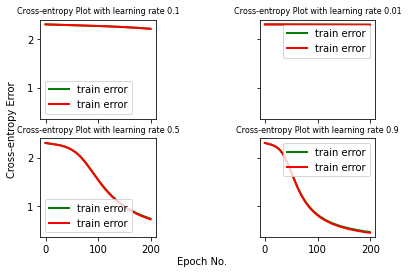

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Cross-entropy Error', ha='center', va='center', rotation='vertical')

i = 0
j = 0
for lr in learning_rate:
  if j == 2:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_cross_entropy[lr], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_cross_entropy[lr], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Cross-entropy Plot' + ' with learning rate ' + str(lr), fontsize = 8)
  axs[i, j].legend()
  j += 1

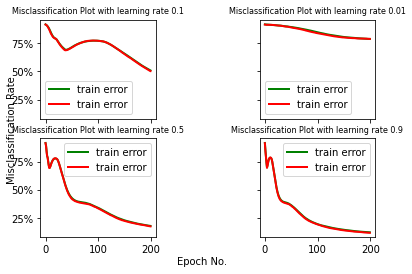

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Misclassification Rate', ha='center', va='center', rotation='vertical')

i = 0
j = 0
for lr in learning_rate:
  if j == 2:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_mean_misclass[lr], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_mean_misclass[lr], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Misclassification Plot' + ' with learning rate ' + str(lr), fontsize = 8)
  axs[i, j].legend()
  axs[i, j].yaxis.set_major_formatter(mtick.PercentFormatter())
  j += 1

**Experiment On Momentum**

In [ ]:
for lr in learning_rate:
  print(test_error_mean_misclass[lr][-1])

50.32
78.88
17.75
12.030000000000001


In [81]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 200
learning_rate = 0.9
momentum = [0.0, 0.5, 0.9]

train_error_cross_entropy = {}
train_error_mean_misclass = {}
test_error_cross_entropy = {}
test_error_mean_misclass = {}

In [82]:
for i, m in enumerate(momentum): # i to keep track model
  torch.manual_seed(42)

  # instantiate a network
  net = OurNet(n_feature = input_size, n_hidden = hidden_size, n_output = num_classes) 

  # optimizing methods
  optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate, momentum = m)
  # choose loss function
  loss_func = torch.nn.CrossEntropyLoss()

  train_error_cross_entropy[m] = []
  train_error_mean_misclass[m] = []
  test_error_cross_entropy[m] = []
  test_error_mean_misclass[m] = []

  if use_cuda:
    net.cuda()
  for t in range(num_epochs):
      # forward passing
      out = net(x_train.cuda())
      loss1 = loss_func(out, y_train.cuda())
      train_error_cross_entropy[m].append(loss1.cpu().detach().numpy())
      train_error_mean_misclass[m].append(misclass_rate(out, y_train))

      # on test set
      out2 = net(x_test.cuda())
      loss2 = loss_func(out2.cuda(), y_test.cuda())
      test_error_cross_entropy[m].append(loss2.cpu().detach().numpy())
      test_error_mean_misclass[m].append(misclass_rate(out2, y_test))

      optimizer.zero_grad()
      loss1.backward()   
      optimizer.step()

  torch.save(net.state_dict(), 'net_m' + str(i) + '_params.pkl')

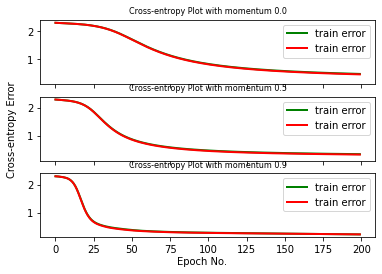

In [83]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Cross-entropy Error', ha='center', va='center', rotation='vertical')

for i, m in enumerate(momentum):
  axs[i].plot(range(num_epochs), train_error_cross_entropy[m], color = 'green', linewidth = 2, label = "train error")
  axs[i].plot(range(num_epochs), test_error_cross_entropy[m], color = 'red', linewidth = 2, label = "train error")
  axs[i].set_title('Cross-entropy Plot' + ' with momentum ' + str(m), fontsize = 8)
  axs[i].legend()

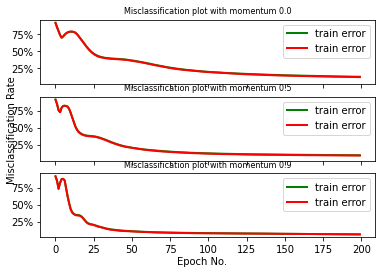

In [84]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Misclassification Rate', ha='center', va='center', rotation='vertical')

for i, m in enumerate(momentum):
  axs[i].plot(range(num_epochs), train_error_mean_misclass[m], color = 'green', linewidth = 2, label = "train error")
  axs[i].plot(range(num_epochs), test_error_mean_misclass[m], color = 'red', linewidth = 2, label = "train error")
  axs[i].set_title('Misclassification plot' + ' with momentum ' + str(m), fontsize = 8)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter())
  axs[i].legend()

## Question 4

### (a) & (b)

In [ ]:
# !nvidia-smi

In [85]:
import torch.utils.data as Data

# BATCH_SIZE = 60000/5

torch_dataset = Data.TensorDataset(x_train.reshape(len(x_train), 1, 28, 28), y_train)
trainloader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = 12000,      # mini batch size
    shuffle = True,               # random shuffle for training
    num_workers = 2,              
)

torch_dataset = Data.TensorDataset(x_test.reshape(len(x_test), 1, 28, 28), y_test)
testloader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = 2000,      # mini batch size
    shuffle = True,               # random shuffle for training
    num_workers = 2,              
)

In [86]:
# Define 2-D CNN network
class OurCNN(torch.nn.Module):     
    def __init__(self, n_hidden, n_output):
        super(OurCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
        self.pool = nn.MaxPool2d(2)
        # self.conv2 = nn.Conv2d(16, 33, 5)
        self.fc1 = torch.nn.Linear(16*12*12 , hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # nonlinear activation
        x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*12*12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 100
learning_rate = 0.01
momentum = 0.9
seed = [1, 15, 27, 34, 42, 55]

train_error_cross_entropy = {}
train_error_mean_misclass = {}
test_error_cross_entropy = {}
test_error_mean_misclass = {}

use_cuda = torch.cuda.is_available()

In [ ]:
for i, s in enumerate(seed):
  torch.manual_seed(s) 

  # instantiate a network
  net = OurCNN(n_hidden = hidden_size, n_output = num_classes) 

  # optimizing methods
  optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate)

  # choose loss function
  # CrossEntropyLoss includes Softmax
  loss_func = torch.nn.CrossEntropyLoss()

  train_error_cross_entropy[s] = []
  train_error_mean_misclass[s] = []
  test_error_cross_entropy[s] = []
  test_error_mean_misclass[s] = []

  if use_cuda:
      net.cuda()
  for epoch in range(num_epochs):  # loop over the train dataset multiple times
      running_loss = 0.0
      running_misclass = 0.0
      for i, (data, target) in enumerate(trainloader, 0): # train set, 5 batches
          # get the inputs; data is a list of [inputs, labels]
          if use_cuda:
            inputs, labels = data.cuda(), target.cuda()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = loss_func(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss
          running_misclass += np.mean(misclass_rate(outputs, labels))

      train_error_mean_misclass[s].append(running_misclass/5)
      train_error_cross_entropy[s].append(running_loss.cpu().data.numpy()/5)

      running_loss = 0.0
      running_misclass = 0.0
      for i, (data, target) in enumerate(testloader, 0): # test set
        if use_cuda:
          inputs, labels = data.cuda(), target.cuda()

        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        running_loss += loss
        running_misclass += np.mean(misclass_rate(outputs, labels))

      test_error_mean_misclass[s].append(running_misclass/5)
      test_error_cross_entropy[s].append(running_loss.cpu().data.numpy()/5)



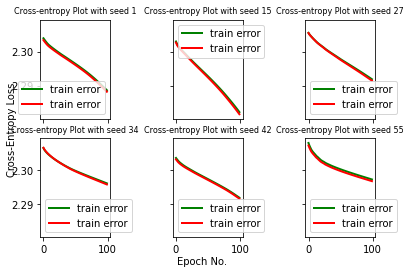

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Cross-Entropy Loss', ha='center', va='center', rotation='vertical')
i = 0
j = 0
for s in seed:
  if j == 3:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_cross_entropy[s], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_cross_entropy[s], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Cross-entropy Plot' + ' with seed ' + str(s), fontsize = 8)
  axs[i, j].legend()
  j += 1

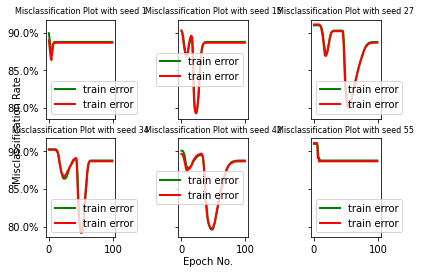

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Misclassification Rate', ha='center', va='center', rotation='vertical')

i = 0
j = 0
for s in seed:
  if j == 3:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_mean_misclass[s], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_mean_misclass[s], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Misclassification Plot' + ' with seed ' + str(s), fontsize = 8)
  axs[i, j].legend()
  axs[i, j].yaxis.set_major_formatter(mtick.PercentFormatter())
  j += 1

### (c)

In [ ]:
list(net.parameters())[0].shape

torch.Size([16, 1, 5, 5])

In [ ]:
# params[0, 0].shape

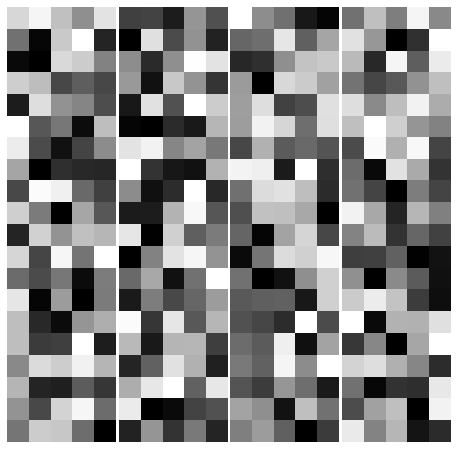

In [ ]:
import matplotlib.pyplot as plt

params = list(net.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(4, 4, i + 1) # Since we know it is a 10 x 10 grid
    x = params[i, 0,:].cpu().data.numpy()
    plt.imshow(x.reshape((5, 5)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace = 0, hspace = 0)
# plt.savefig("<filename>.png")

### (d)

**Experiemnt on Learning Rate**

In [ ]:
# for s in seed:
#   print(test_error_mean_misclass[i][-1])

In [ ]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 50
learning_rate = [0.1, 0.01, 0.2, 0.5]
momentum = 0.9

train_error_cross_entropy = {}
train_error_mean_misclass = {}
test_error_cross_entropy = {}
test_error_mean_misclass = {}

use_cuda = torch.cuda.is_available()

In [ ]:
for i, s in enumerate(learning_rate):
  torch.manual_seed(42) 

  # instantiate a network
  net = OurCNN(n_hidden = hidden_size, n_output = num_classes) 

  # optimizing methods
  optimizer = torch.optim.SGD(net.parameters(), lr = s)

  # choose loss function
  # CrossEntropyLoss includes Softmax
  loss_func = torch.nn.CrossEntropyLoss()

  train_error_cross_entropy[s] = []
  train_error_mean_misclass[s] = []
  test_error_cross_entropy[s] = []
  test_error_mean_misclass[s] = []

  if use_cuda:
      net.cuda()
  for epoch in range(num_epochs):  # loop over the train dataset multiple times
      running_loss = 0.0
      running_misclass = 0.0
      for i, (data, target) in enumerate(trainloader, 0): # train set, 5 batches
          # get the inputs; data is a list of [inputs, labels]
          if use_cuda:
            inputs, labels = data.cuda(), target.cuda()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = loss_func(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss
          running_misclass += np.mean(misclass_rate(outputs, labels))

      train_error_mean_misclass[s].append(running_misclass/5)
      train_error_cross_entropy[s].append(running_loss.cpu().data.numpy()/5)

      running_loss = 0.0
      running_misclass = 0.0
      for i, (data, target) in enumerate(testloader, 0): # test set
        if use_cuda:
          inputs, labels = data.cuda(), target.cuda()

        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        running_loss += loss
        running_misclass += np.mean(misclass_rate(outputs, labels))

      test_error_mean_misclass[s].append(running_misclass/5)
      test_error_cross_entropy[s].append(running_loss.cpu().data.numpy()/5)

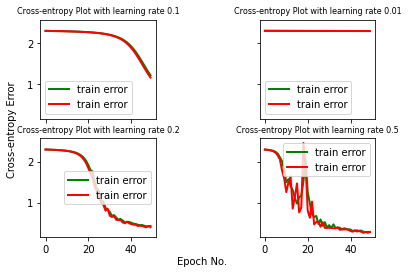

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Cross-entropy Error', ha='center', va='center', rotation='vertical')

i = 0
j = 0
for lr in learning_rate:
  if j == 2:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_cross_entropy[lr], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_cross_entropy[lr], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Cross-entropy Plot' + ' with learning rate ' + str(lr), fontsize = 8)
  axs[i, j].legend()
  j += 1

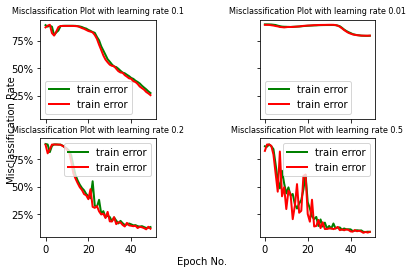

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Misclassification Rate', ha='center', va='center', rotation='vertical')

i = 0
j = 0
for lr in learning_rate:
  if j == 2:
    i += 1
    j = 0
  axs[i, j].plot(range(num_epochs), train_error_mean_misclass[lr], color = 'green', linewidth = 2, label = "train error")
  axs[i, j].plot(range(num_epochs), test_error_mean_misclass[lr], color = 'red', linewidth = 2, label = "train error")
  axs[i, j].set_title('Misclassification Plot' + ' with learning rate ' + str(lr), fontsize = 8)
  axs[i, j].legend()
  axs[i, j].yaxis.set_major_formatter(mtick.PercentFormatter())
  j += 1

**Experiment ON Momentum**

In [ ]:
for lr in learning_rate:
  print(test_error_mean_misclass[lr][-1])

25.419999999999998
79.81
11.719999999999999
8.84


In [87]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 100
learning_rate = 0.5
momentum = [0.0, 0.5, 0.9]

train_error_cross_entropy = {}
train_error_mean_misclass = {}
test_error_cross_entropy = {}
test_error_mean_misclass = {}

use_cuda = torch.cuda.is_available()

In [ ]:
for i, s in enumerate(momentum):
  torch.manual_seed(42) 

  # instantiate a network
  net = OurCNN(n_hidden = hidden_size, n_output = num_classes) 

  # optimizing methods
  optimizer = torch.optim.SGD(net.parameters(), lr = learning_rate, momentum = s)

  # choose loss function
  # CrossEntropyLoss includes Softmax
  loss_func = torch.nn.CrossEntropyLoss()

  train_error_cross_entropy[s] = []
  train_error_mean_misclass[s] = []
  test_error_cross_entropy[s] = []
  test_error_mean_misclass[s] = []

  if use_cuda:
      net.cuda()
  for epoch in range(num_epochs):  # loop over the train dataset multiple times
      running_loss = 0.0
      running_misclass = 0.0
      for i, (data, target) in enumerate(trainloader, 0): # train set, 5 batches
          # get the inputs; data is a list of [inputs, labels]
          if use_cuda:
            inputs, labels = data.cuda(), target.cuda()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = loss_func(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss
          running_misclass += np.mean(misclass_rate(outputs, labels))

      train_error_mean_misclass[s].append(running_misclass/5)
      train_error_cross_entropy[s].append(running_loss.cpu().data.numpy()/5)

      running_loss = 0.0
      running_misclass = 0.0
      for i, (data, target) in enumerate(testloader, 0): # test set
        if use_cuda:
          inputs, labels = data.cuda(), target.cuda()

        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        running_loss += loss
        running_misclass += np.mean(misclass_rate(outputs, labels))

      test_error_mean_misclass[s].append(running_misclass/5)
      test_error_cross_entropy[s].append(running_loss.cpu().data.numpy()/5)

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Cross-entropy Error', ha='center', va='center', rotation='vertical')

for i, m in enumerate(momentum):
  axs[i].plot(range(num_epochs), train_error_cross_entropy[m], color = 'green', linewidth = 2, label = "train error")
  axs[i].plot(range(num_epochs), test_error_cross_entropy[m], color = 'red', linewidth = 2, label = "train error")
  axs[i].set_title('Cross-entropy Plot' + ' with momentum ' + str(m), fontsize = 8)
  axs[i].legend()


In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
plt.subplots_adjust(wspace= 0.9, hspace=0.2)
fig.text(0.5, 0.04, 'Epoch No.', ha='center', va='center')
fig.text(0.06, 0.5, 'Misclassification Rate', ha='center', va='center', rotation='vertical')

for i, m in enumerate(momentum):
  axs[i].plot(range(num_epochs), train_error_mean_misclass[m], color = 'green', linewidth = 2, label = "train error")
  axs[i].plot(range(num_epochs), test_error_mean_misclass[m], color = 'red', linewidth = 2, label = "train error")
  axs[i].set_title('Cross-entropy Plot' + ' with momentum ' + str(m), fontsize = 8)
  axs[i].yaxis.set_major_formatter(mtick.PercentFormatter())
  axs[i].legend()

In [ ]:
for m in momentum:
  print(test_error_mean_misclass[m][-1])

4.58
3.5300000000000002
3.7600000000000002


# Question 5

In [ ]:
cv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
p = nn.MaxPool2d(2)
cv2 = nn.Conv2d(16, 33, 5)
f1 = torch.nn.Linear(16*12*12 , hidden_size)
f2 = torch.nn.Linear(hidden_size, num_classes)

In [ ]:
p(cv2(p(cv1(x_test.reshape(10000, 1, 28, 28))))).shape

torch.Size([10000, 33, 4, 4])

In [ ]:
import torch.utils.data as Data

# BATCH_SIZE = 60000/5

torch_dataset = Data.TensorDataset(x_train.reshape(len(x_train), 1, 28, 28), y_train)
trainloader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = 12000,      # mini batch size
    shuffle = True,               # random shuffle for training
    num_workers = 2,              
)

torch_dataset = Data.TensorDataset(x_test.reshape(len(x_test), 1, 28, 28), y_test)
testloader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = 2000,      # mini batch size
    shuffle = True,               # random shuffle for training
    num_workers = 2,              
)

In [67]:
class OurCNN(torch.nn.Module):     
    def __init__(self, n_hidden, n_output):
        super(OurCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
        self.conv1_bn = nn.BatchNorm2d(16)

        self.pool = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(16, 33, 5)
        self.conv2_bn=nn.BatchNorm2d(33)

        self.dropout1=nn.Dropout(0.25)

        self.fc1 = torch.nn.Linear(33*4*4 , hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # nonlinear activation
        x = self.conv1(x)
        x = self.pool(F.relu(self.conv1_bn(x)))
        x = self.conv2(x)
        x = self.pool(F.relu(self.conv2_bn(x)))
        x = self.dropout1(x)
        x = x.view(-1, 33*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [71]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 300
# batch_size = 100
learning_rate = 0.01
momentum = 0.9

In [72]:
torch.manual_seed(42) 

# instantiate a network
cnn_net_best = OurCNN(n_hidden = hidden_size, n_output = num_classes) 

# optimizing methods
optimizer = torch.optim.SGD(cnn_net_best.parameters(), lr = learning_rate, momentum = momentum)

# choose loss function
# CrossEntropyLoss includes Softmax
loss_func = torch.nn.CrossEntropyLoss()

train_error_cross_entropy = []
train_error_mean_misclass = []
test_error_cross_entropy = []
test_error_mean_misclass = []

use_cuda = torch.cuda.is_available()

if use_cuda:
    cnn_net_best.cuda()
for epoch in range(num_epochs):  # loop over the train dataset multiple times
    running_loss = 0.0
    running_misclass = 0.0
    for i, (data, target) in enumerate(trainloader, 0): # train set, 5 batches
        # get the inputs; data is a list of [inputs, labels]
        if use_cuda:
          inputs, labels = data.cuda(), target.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_net_best(inputs)
        loss = loss_func(outputs, labels)
        running_loss += loss
        loss.backward()
        optimizer.step()

        running_misclass += misclass_rate(outputs, labels)

    train_error_mean_misclass.append(running_misclass/5)
    train_error_cross_entropy.append(running_loss.cpu().data.numpy()/5)

    running_loss = 0.0
    running_misclass = 0.0
    for i, (data, target) in enumerate(testloader, 0): # test set
      if use_cuda:
        inputs, labels = data.cuda(), target.cuda()
        outputs = cnn_net_best(inputs)
        loss = loss_func(outputs, labels)
        running_loss += loss
        
        running_misclass += misclass_rate(outputs, labels)

    test_error_mean_misclass.append(running_misclass/5)
    test_error_cross_entropy.append(running_loss.cpu().data.numpy()/5)

NameError: ignored

In [73]:
torch.save(cnn_net_best.state_dict(), 'cnn_best_param.pkl')

In [74]:
test_error_mean_misclass[-1]

1.1400000000000001

# 5. More about Deep Learning

## Question 6

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [1]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [4]:
train = np.loadtxt('/drive/My Drive/SML_project/train.txt', delimiter = ',', dtype = np.float32)
val = np.loadtxt('/drive/My Drive/SML_project/val.txt', delimiter = ',', dtype = np.float32)
test = np.loadtxt('/drive/My Drive/SML_project/test.txt', delimiter = ',', dtype = np.float32)

In [ ]:
# 20000, 1569
train.shape

# 5000, 1569
val.shape

# 5000, 1569
test.shape

(5000, 1569)

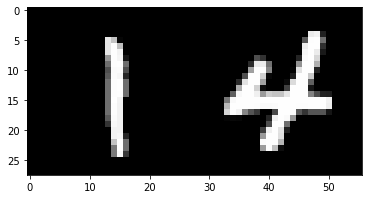

5.0


In [7]:
plt.imshow(train[0, 0:1568].reshape(28, 56), cmap = plt.get_cmap('gray'))
plt.show()
print(train[0, -1])

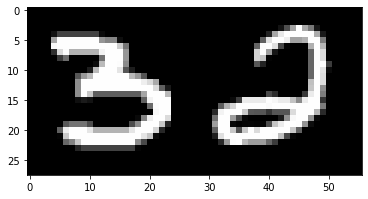

5.0


In [8]:
plt.imshow(train[1, 0:1568].reshape(28, 56), cmap = plt.get_cmap('gray'))
plt.show()
print(train[1, -1])

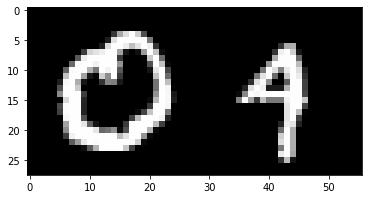

4.0


In [ ]:
plt.imshow(train[2, 0:1568].reshape(28, 56), cmap = plt.get_cmap('gray'))
plt.show()
print(train[2, -1])

**It turns out that the sum of 2 digits is euqal to the last coordinate of each row.**

## Question 7


In [ ]:
class OurCNN(torch.nn.Module):     
    def __init__(self, n_hidden, n_output):
        super(OurCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
        self.conv1_bn = nn.BatchNorm2d(16)

        self.pool = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(16, 33, 5)
        self.conv2_bn=nn.BatchNorm2d(33)

        self.dropout1=nn.Dropout(0.25)

        self.fc1 = torch.nn.Linear(33*4*4 , hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # nonlinear activation
        x = self.conv1(x)
        x = self.pool(F.relu(self.conv1_bn(x)))
        x = self.conv2(x)
        x = self.pool(F.relu(self.conv2_bn(x)))
        x = self.dropout1(x)
        x = x.view(-1, 33*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# hyper parameters
input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 300
# batch_size = 100
learning_rate = 0.01
momentum = 0.9

In [ ]:
# 20000, 1569
train.shape

# 5000, 1569
val.shape

# 5000, 1569
test.shape

In [75]:
# np.unique(train[:, -1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.], dtype=float32)

In [5]:
x_train = train[:, 0:1568].reshape(len(train), 28*56)
y_train = train[:, -1]

x_val = val[:, 0:1568].reshape(len(val), 28*56)
y_val = val[:, -1]

x_test = test[:, 0:1568].reshape(len(test), 28*56)
y_test = test[:, -1]

In [10]:
x_train_scale = preprocessing.normalize(x_train.reshape(-1,1568))
x_val_scale = preprocessing.normalize(x_val.reshape(-1,1568))
x_test_scale = preprocessing.normalize(x_test.reshape(-1,1568))

ohe = OneHotEncoder(categories='auto',  
                    sparse=True,
                    handle_unknown='ignore')                

y_train_enc = ohe.fit_transform(y_train.reshape(-1, 1))
y_val_enc = ohe.fit_transform(y_val.reshape(-1, 1))
y_test_enc = ohe.fit_transform(y_test.reshape(-1,1))

In [11]:
x_train = torch.from_numpy(x_train_scale).type(torch.FloatTensor)
x_val = torch.from_numpy(x_val_scale).type(torch.FloatTensor)
x_test = torch.from_numpy(x_test_scale).type(torch.FloatTensor)

y_train = torch.from_numpy(y_train_enc.toarray()).type(torch.FloatTensor)
y_val = torch.from_numpy(y_val_enc.toarray()).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test_enc.toarray()).type(torch.FloatTensor)

In [12]:
import torch.utils.data as Data

# BATCH_SIZE = 20000/5

torch_dataset = Data.TensorDataset(x_train.reshape(len(x_train), 1, 28, 56), y_train)
trainloader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = 4000,      # mini batch size
    shuffle = True,         # random shuffle for training
    num_workers = 2,              
)

# torch_dataset = Data.TensorDataset(x_val.reshape(len(x_test), 1, 28, 28), y_val)
# valloader = Data.DataLoader(
#     dataset = torch_dataset,
#     batch_size = 1000,      # mini batch size
#     shuffle = True,               # random shuffle for training
#     num_workers = 2,              
# )

In [16]:
# cv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
# cv1_bn = nn.BatchNorm2d(16)

# p = nn.MaxPool2d(2)

# cv2 = nn.Conv2d(16, 33, 5)
# cv2_bn=nn.BatchNorm2d(33)

# dropout1=nn.Dropout(0.25)

# fc1 = torch.nn.Linear(33*4*4 , hidden_size)
# fc2 = torch.nn.Linear(hidden_size, num_classes)

# r1 = p(cv1(x_train.reshape(len(x_train), 1, 28, 56)))
# r2 = p(cv2(r1))

In [22]:
# r2.shape

torch.Size([20000, 33, 4, 11])

In [23]:
class OurCNN(torch.nn.Module):     
    def __init__(self, n_hidden, n_output):
        super(OurCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5) # one grey scale channel, output channel size, kernel size
        self.conv1_bn = nn.BatchNorm2d(16)

        self.pool = nn.MaxPool2d(2)
        
        self.conv2 = nn.Conv2d(16, 33, 5)
        self.conv2_bn=nn.BatchNorm2d(33)

        self.dropout1=nn.Dropout(0.25)

        self.fc1 = torch.nn.Linear(33*4*11 , hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # nonlinear activation
        x = self.conv1(x)
        x = self.pool(F.relu(self.conv1_bn(x)))
        x = self.conv2(x)
        x = self.pool(F.relu(self.conv2_bn(x)))
        x = self.dropout1(x)
        x = x.view(-1, 33*4*11)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def misclass_rate(out, label):
    pre = np.argmax(out.cpu().detach().numpy(), axis = 1)
    y = np.argmax(label.cpu().numpy(), axis = 1)
    count_correct = np.sum(pre == y)
    error_rate = (pre.shape[0] - count_correct) / pre.shape[0]
    return error_rate * 100

In [27]:
# input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 19
num_epochs = 200
# batch_size = 100
learning_rate = 0.01
momentum = 0.9

In [44]:
def nn_training_val_error(hidden_size, num_classes, num_epochs, lr, m, seed, file_marker):
  torch.manual_seed(seed) 

  # instantiate a network
  cnn_net = OurCNN(n_hidden = hidden_size, n_output = num_classes) 

  # optimizing methods
  optimizer = torch.optim.SGD(cnn_net.parameters(), lr = learning_rate, momentum = m)

  # choose loss function
  # CrossEntropyLoss includes Softmax
  loss_func = torch.nn.CrossEntropyLoss()

  use_cuda = torch.cuda.is_available()

  if use_cuda:
      cnn_net.cuda()
  for epoch in range(num_epochs):  # loop over the train dataset multiple times
      for i, (data, target) in enumerate(trainloader, 0): # train set, 5 batches
          # get the inputs; data is a list of [inputs, labels]
          if use_cuda:
            inputs, labels = data.cuda(), target.cuda()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = cnn_net(inputs)
          loss = loss_func(outputs, labels)
          loss.backward()
          optimizer.step()

  torch.save(cnn_net.state_dict(), 'cnn_net_' + str(file_marker) + '.pkl')

  running_loss = 0.0
  running_misclass = 0.0
  for i, (data, target) in enumerate(valloader, 0): # train set, 5 batches
      # get the inputs; data is a list of [inputs, labels]
      if use_cuda:
        inputs, labels = data.cuda(), target.cuda()
        
      outputs = cnn_net(inputs)
      loss = loss_func(outputs, labels)
      running_loss += loss
      running_misclass += misclass_rate(outputs, labels)

  return (running_misclass/5, running_loss.cpu().data.numpy()/5)


In [45]:
val_misclass_list = []

In [47]:

for i, s in enumerate([1, 15, 27, 34, 42]):
  val_misclass_list.append(nn_training_val_error(hidden_size = hidden_size, num_classes = num_classes, num_epochs = num_epochs, lr = learning_rate, m = momentum, seed = s, file_marker = i))

# for i, lr in enumerate([0.1, 0.01, 0.2, 0.5]):
#   nn_training_val_error(hidden_size = hidden_size, num_classes = num_classes, num_epochs = num_epochs, lr = lr, m = momentum, seed = 42, file_marker = i)

# for i, s in enuermate([]):

In [49]:
for i, lr in enumerate([0.1, 0.01, 0.2, 0.5]):
  val_misclass_list.append(nn_training_val_error(hidden_size = hidden_size, num_classes = num_classes, num_epochs = num_epochs, lr = lr, m = momentum, seed = 34, file_marker = i + 5))


In [51]:
for i, m in enumerate([0.0, 0.5, 0.9]):
  val_misclass_list.append(nn_training_val_error(hidden_size = hidden_size, num_classes = num_classes, num_epochs = num_epochs, lr = 0.5, m = m, seed = 34, file_marker = i + 5 + 4))

In [52]:
val_misclass_list

[(8.139999999999999, 0.2648502826690674),
 (7.94, 0.27201821804046633),
 (7.840000000000001, 0.2573185205459595),
 (7.92, 0.2662304401397705),
 (8.82, 0.29030134677886965),
 (8.120000000000001, 0.266994571685791),
 (8.02, 0.2670419454574585),
 (8.02, 0.26831104755401614),
 (8.0, 0.26696689128875734),
 (55.239999999999995, 1.7396659851074219),
 (24.32, 0.8718632698059082),
 (8.02, 0.2688783645629883)]

In [53]:
# input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 19
num_epochs = 200
learning_rate = 0.01
momentum = 0.9

In [54]:
torch.manual_seed(42) 

# instantiate a network
cnn_net = OurCNN(n_hidden = hidden_size, n_output = num_classes) 

# optimizing methods
optimizer = torch.optim.SGD(cnn_net.parameters(), lr = learning_rate, momentum = momentum)

# choose loss function
# CrossEntropyLoss includes Softmax
loss_func = torch.nn.CrossEntropyLoss()

train_error_cross_entropy = []
train_error_mean_misclass = []
# test_error_cross_entropy = []
# test_error_mean_misclass = []

use_cuda = torch.cuda.is_available()

if use_cuda:
    cnn_net.cuda()
for epoch in range(num_epochs):  # loop over the train dataset multiple times
    running_loss = 0.0
    running_misclass = 0.0
    for i, (data, target) in enumerate(trainloader, 0): # train set, 5 batches
        # get the inputs; data is a list of [inputs, labels]
        if use_cuda:
          inputs, labels = data.cuda(), target.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = cnn_net(inputs)
        loss = loss_func(outputs, labels)
        running_loss += loss
        loss.backward()
        optimizer.step()

        running_misclass += misclass_rate(outputs, labels)

    train_error_mean_misclass.append(running_misclass/5)
    train_error_cross_entropy.append(running_loss.cpu().data.numpy()/5)

In [29]:
train_error_mean_misclass[-1]

2.065

In [30]:
torch_dataset = Data.TensorDataset(x_val.reshape(len(x_val), 1, 28, 56), y_val)
valloader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = 1000,      # mini batch size
    shuffle = True,               # random shuffle for training
    num_workers = 2,              
)

In [34]:
# classify on val set
test_error_cross_entropy = []
test_error_mean_misclass = []

running_loss = 0.0
running_misclass = 0.0
for i, (data, target) in enumerate(valloader, 0): # train set, 5 batches
    # get the inputs; data is a list of [inputs, labels]
    if use_cuda:
      inputs, labels = data.cuda(), target.cuda()
      
    outputs = cnn_net(inputs)
    loss = loss_func(outputs, labels)
    running_loss += loss
    running_misclass += misclass_rate(outputs, labels)

test_error_mean_misclass.append(running_misclass/5)
test_error_cross_entropy.append(running_loss.cpu().data.numpy()/5)

In [35]:
test_error_mean_misclass

[8.06]

In [55]:
torch_dataset = Data.TensorDataset(x_test.reshape(len(x_test), 1, 28, 56), y_test)
testloader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = 1000,      # mini batch size
    shuffle = True,         # random shuffle for training
    num_workers = 2,              
)

In [56]:
# classification on test set
running_loss = 0.0
running_misclass = 0.0
for i, (data, target) in enumerate(testloader, 0): # train set, 5 batches
    # get the inputs; data is a list of [inputs, labels]
    if use_cuda:
      inputs, labels = data.cuda(), target.cuda()
      
    outputs = cnn_net(inputs)
    loss = loss_func(outputs, labels)
    running_loss += loss
    running_misclass += misclass_rate(outputs, labels)

In [57]:
print(running_misclass/5)

7.6
